In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 50.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━

In [3]:
!pip install git+https://github.com/pycaret/pycaret.git@master

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-kmz234nq
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-kmz234nq
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 28.0 MB/s eta 0:00:00
  Created wheel for pycaret: filename=pycaret-3.4.0-py3-none-any.whl size=491177 sha256=b31021e6c665039fb5fbb1fe159f9bddff329f6738d01eee17366ceecde24cdb
  Stored in directory: /tm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier

import shap
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_squared_log_error, root_mean_squared_log_error, mean_absolute_percentage_error, median_absolute_error, max_error

In [3]:
import pycaret
# init setup
from pycaret.regression import *

In [4]:
catboost_model = load_model('optimised_catboost_model_G_VRH')
catboost_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['0-norm', '2-norm', '3-norm',
                                             '5-norm', '7-norm', '10-norm',
                                             'MagpieData minimum Number',
                                             'MagpieData maximum Number',
                                             'MagpieData range Number',
                                             'MagpieData mean Number',
                                             'MagpieData avg_dev Number',
                                             'MagpieData mode Number',
                                             'MagpieData minimum '
                                             'MendeleevNumber',
                                             'MagpieData maxim...
                                             'MagpieData mode MeltingT', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7bb19c57ba40>)])

In [5]:
catboost_model = catboost_model[-1]
catboost_model

In [6]:
df = pd.read_csv('mech_prop_training_dataset.csv')
df

,material_id,K_VRH,G_VRH,Pugh_Ratio,builder_meta,nsites,elements,nelements,composition_reduced,formula_pretty,...,maximum local difference in GSmagmom,range local difference in GSmagmom,mean local difference in GSmagmom,avg_dev local difference in GSmagmom,minimum local difference in SpaceGroupNumber,maximum local difference in SpaceGroupNumber,range local difference in SpaceGroupNumber,mean local difference in SpaceGroupNumber,avg_dev local difference in SpaceGroupNumber,exists
0,mp-1,2.0,0.0,inf,emmet_version='0.72.20' pymatgen_version='2023...,1.0,[Element Cs],1.0,Cs1,Cs,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,True
1,mp-10,80.0,43.0,1.860465,emmet_version='0.72.20' pymatgen_version='2023...,2.0,[Element As],1.0,As1,As,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,True
2,mp-1000,26.0,16.0,1.625000,emmet_version='0.72.20' pymatgen_version='2023...,2.0,"[Element Ba, Element Te]",2.0,Ba1 Te1,BaTe,...,0.000000,0.000000e+00,0.000000,0.000000e+00,76.999987,76.999987,0.000000,76.999987,0.000000,True
3,mp-10000,131.0,74.0,1.770270,emmet_version='0.72.20' pymatgen_version='2023...,6.0,"[Element Hf, Element S]",2.0,Hf2 S1,Hf2S,...,0.000000,0.000000e+00,0.000000,0.000000e+00,44.415333,96.285363,51.870030,61.705343,23.053347,True
4,mp-10003,191.0,97.0,1.969072,emmet_version='0.72.20' pymatgen_version='2023...,12.0,"[Element Co, Element Nb, Element Si]",3.0,Nb4 Co1 Si1,Nb4CoSi,...,1.288343,1.288343e+00,0.396151,2.973975e-01,1.621693,29.120347,27.498654,9.467731,6.550872,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16498,mp-999550,132.0,48.0,2.750000,emmet_version='0.72.20' pymatgen_version='2023...,4.0,"[Element Ga, Element Mn]",2.0,Mn3 Ga1,Mn3Ga,...,0.000310,2.406508e-04,0.000155,7.753017e-05,34.273413,153.000000,118.726587,76.500000,38.250000,True
16499,mp-999558,205.0,89.0,2.303371,emmet_version='0.72.20' pymatgen_version='2023...,4.0,"[Element Mn, Element Ni, Element Si]",3.0,Mn2 Si1 Ni1,Mn2SiNi,...,0.595205,4.617801e-01,0.297697,1.487538e-01,5.344055,6.896037,1.551982,5.896037,0.500000,True
16500,mp-999576,232.0,115.0,2.017391,emmet_version='0.72.20' pymatgen_version='2023...,4.0,"[Element Mn, Element Ru, Element Si]",3.0,Mn2 Si1 Ru1,Mn2SiRu,...,0.000190,5.421011e-20,0.000190,2.710505e-20,9.032166,26.879954,17.847788,16.500000,6.401924,True
16501,mp-9996,12.0,10.0,1.200000,emmet_version='0.72.20' pymatgen_version='2023...,24.0,"[Element P, Element Si]",2.0,Si1 P2,SiP2,...,0.000000,0.000000e+00,0.000000,0.000000e+00,37.463038,186.001437,148.538399,112.163384,49.582687,True


In [7]:
compositional_features_only_df = df[['0-norm',
 '2-norm',
 '3-norm',
 '5-norm',
 '7-norm',
 '10-norm',
 'MagpieData minimum Number',
 'MagpieData maximum Number',
 'MagpieData range Number',
 'MagpieData mean Number',
 'MagpieData avg_dev Number',
 'MagpieData mode Number',
 'MagpieData minimum MendeleevNumber',
 'MagpieData maximum MendeleevNumber',
 'MagpieData range MendeleevNumber',
 'MagpieData mean MendeleevNumber',
 'MagpieData avg_dev MendeleevNumber',
 'MagpieData mode MendeleevNumber',
 'MagpieData minimum AtomicWeight',
 'MagpieData maximum AtomicWeight',
 'MagpieData range AtomicWeight',
 'MagpieData mean AtomicWeight',
 'MagpieData avg_dev AtomicWeight',
 'MagpieData mode AtomicWeight',
 'MagpieData minimum MeltingT',
 'MagpieData maximum MeltingT',
 'MagpieData range MeltingT',
 'MagpieData mean MeltingT',
 'MagpieData avg_dev MeltingT',
 'MagpieData mode MeltingT',
 'MagpieData minimum Column',
 'MagpieData maximum Column',
 'MagpieData range Column',
 'MagpieData mean Column',
 'MagpieData avg_dev Column',
 'MagpieData mode Column',
 'MagpieData minimum Row',
 'MagpieData maximum Row',
 'MagpieData range Row',
 'MagpieData mean Row',
 'MagpieData avg_dev Row',
 'MagpieData mode Row',
 'MagpieData minimum CovalentRadius',
 'MagpieData maximum CovalentRadius',
 'MagpieData range CovalentRadius',
 'MagpieData mean CovalentRadius',
 'MagpieData avg_dev CovalentRadius',
 'MagpieData mode CovalentRadius',
 'MagpieData minimum Electronegativity',
 'MagpieData maximum Electronegativity',
 'MagpieData range Electronegativity',
 'MagpieData mean Electronegativity',
 'MagpieData avg_dev Electronegativity',
 'MagpieData mode Electronegativity',
 'MagpieData minimum NsValence',
 'MagpieData maximum NsValence',
 'MagpieData range NsValence',
 'MagpieData mean NsValence',
 'MagpieData avg_dev NsValence',
 'MagpieData mode NsValence',
 'MagpieData minimum NpValence',
 'MagpieData maximum NpValence',
 'MagpieData range NpValence',
 'MagpieData mean NpValence',
 'MagpieData avg_dev NpValence',
 'MagpieData mode NpValence',
 'MagpieData minimum NdValence',
 'MagpieData maximum NdValence',
 'MagpieData range NdValence',
 'MagpieData mean NdValence',
 'MagpieData avg_dev NdValence',
 'MagpieData mode NdValence',
 'MagpieData minimum NfValence',
 'MagpieData maximum NfValence',
 'MagpieData range NfValence',
 'MagpieData mean NfValence',
 'MagpieData avg_dev NfValence',
 'MagpieData mode NfValence',
 'MagpieData minimum NValence',
 'MagpieData maximum NValence',
 'MagpieData range NValence',
 'MagpieData mean NValence',
 'MagpieData avg_dev NValence',
 'MagpieData mode NValence',
 'MagpieData minimum NsUnfilled',
 'MagpieData maximum NsUnfilled',
 'MagpieData range NsUnfilled',
 'MagpieData mean NsUnfilled',
 'MagpieData avg_dev NsUnfilled',
 'MagpieData mode NsUnfilled',
 'MagpieData minimum NpUnfilled',
 'MagpieData maximum NpUnfilled',
 'MagpieData range NpUnfilled',
 'MagpieData mean NpUnfilled',
 'MagpieData avg_dev NpUnfilled',
 'MagpieData mode NpUnfilled',
 'MagpieData minimum NdUnfilled',
 'MagpieData maximum NdUnfilled',
 'MagpieData range NdUnfilled',
 'MagpieData mean NdUnfilled',
 'MagpieData avg_dev NdUnfilled',
 'MagpieData mode NdUnfilled',
 'MagpieData minimum NfUnfilled',
 'MagpieData maximum NfUnfilled',
 'MagpieData range NfUnfilled',
 'MagpieData mean NfUnfilled',
 'MagpieData avg_dev NfUnfilled',
 'MagpieData mode NfUnfilled',
 'MagpieData minimum NUnfilled',
 'MagpieData maximum NUnfilled',
 'MagpieData range NUnfilled',
 'MagpieData mean NUnfilled',
 'MagpieData avg_dev NUnfilled',
 'MagpieData mode NUnfilled',
 'MagpieData minimum GSvolume_pa',
 'MagpieData maximum GSvolume_pa',
 'MagpieData range GSvolume_pa',
 'MagpieData mean GSvolume_pa',
 'MagpieData avg_dev GSvolume_pa',
 'MagpieData mode GSvolume_pa',
 'MagpieData minimum GSbandgap',
 'MagpieData maximum GSbandgap',
 'MagpieData range GSbandgap',
 'MagpieData mean GSbandgap',
 'MagpieData avg_dev GSbandgap',
 'MagpieData mode GSbandgap',
 'MagpieData minimum GSmagmom',
 'MagpieData maximum GSmagmom',
 'MagpieData range GSmagmom',
 'MagpieData mean GSmagmom',
 'MagpieData avg_dev GSmagmom',
 'MagpieData mode GSmagmom',
 'MagpieData minimum SpaceGroupNumber',
 'MagpieData maximum SpaceGroupNumber',
 'MagpieData range SpaceGroupNumber',
 'MagpieData mean SpaceGroupNumber',
 'MagpieData avg_dev SpaceGroupNumber',
 'MagpieData mode SpaceGroupNumber',
 'frac s valence electrons',
 'frac p valence electrons',
 'frac d valence electrons',
 'frac f valence electrons',
 'compound possible',
 'max ionic char',
 'avg ionic char', 'K_VRH', 'G_VRH', 'Pugh_Ratio']]
compositional_features_only_df

,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,...,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char,K_VRH,G_VRH,Pugh_Ratio
0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,55.0,55.0,0.0,55.000000,...,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,2.0,0.0,inf
1,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,33.0,33.0,0.0,33.000000,...,0.133333,0.200000,0.666667,0.000000,1.0,0.000000,0.000000,80.0,43.0,1.860465
2,2.0,0.707107,0.629961,0.574349,0.552045,0.535887,52.0,56.0,4.0,54.000000,...,0.222222,0.222222,0.555556,0.000000,1.0,0.306515,0.076629,26.0,16.0,1.625000
3,2.0,0.745356,0.693361,0.670782,0.667408,0.666732,16.0,72.0,56.0,53.333333,...,0.142857,0.095238,0.095238,0.666667,0.0,0.336084,0.074685,131.0,74.0,1.770270
4,3.0,0.707107,0.673540,0.666927,0.666678,0.666667,14.0,41.0,27.0,34.166667,...,0.242424,0.060606,0.696970,0.000000,0.0,0.022249,0.004631,191.0,97.0,1.969072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16498,2.0,0.790569,0.759147,0.750616,0.750049,0.750001,25.0,31.0,6.0,26.500000,...,0.235294,0.029412,0.735294,0.000000,0.0,0.016758,0.003142,132.0,48.0,2.750000
16499,3.0,0.612372,0.538609,0.506099,0.501109,0.500098,14.0,28.0,14.0,23.000000,...,0.285714,0.071429,0.642857,0.000000,0.0,0.031881,0.007757,205.0,89.0,2.303371
16500,3.0,0.612372,0.538609,0.506099,0.501109,0.500098,14.0,44.0,30.0,27.000000,...,0.269231,0.076923,0.653846,0.000000,0.0,0.100238,0.017690,232.0,115.0,2.017391
16501,2.0,0.745356,0.693361,0.670782,0.667408,0.666732,14.0,15.0,1.0,14.666667,...,0.428571,0.571429,0.000000,0.000000,0.0,0.020806,0.004623,12.0,10.0,1.200000


In [8]:
X_comp_features = compositional_features_only_df.drop(['K_VRH', 'G_VRH', 'Pugh_Ratio'], axis = 1)
y_comp_features = compositional_features_only_df[['K_VRH', 'G_VRH',	'Pugh_Ratio']]

In [9]:
FI_another_new_scaler = StandardScaler().fit(X_comp_features)
X_scaled = FI_another_new_scaler.transform(X_comp_features)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X_comp_features.columns
X_scaled

,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,...,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char
0,-2.199354,4.108703,4.012444,3.814678,3.715915,3.642871,2.725259,0.267356,-1.650549,1.613352,...,1.493352,-1.412738,1.332049,4.967439,-1.308491,-1.321304,-0.616619,1.094825,-1.406874,-1.347521
1,-2.199354,4.108703,4.012444,3.814678,3.715915,3.642871,1.239810,-0.727488,-1.650549,0.319804,...,0.363459,-1.412738,0.649227,-1.042579,-0.340794,1.381141,-0.616619,1.094825,-1.406874,-1.347521
2,-1.129119,0.519614,0.241041,-0.041268,-0.172650,-0.271289,2.522697,0.312576,-1.458901,1.554554,...,0.802862,-0.426828,0.497489,-0.426167,-0.233272,0.930734,-0.616619,1.094825,-0.436752,-0.172355
3,-1.129119,0.988316,0.887215,0.832313,0.828786,0.832210,0.091962,1.036100,1.032517,1.515356,...,0.124328,-0.001449,0.952703,-0.976535,-0.847683,-0.935240,2.810859,-0.913388,-0.343164,-0.202157
4,-0.058885,0.519614,0.685198,0.797388,0.822449,0.831662,-0.043078,-0.365727,-0.356928,0.388401,...,1.382754,-1.166616,1.332049,-0.286073,-1.015250,1.503980,-0.616619,-0.913388,-1.336456,-1.276494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16498,-1.129119,1.542358,1.557698,1.555525,1.546165,1.534474,0.699646,-0.817929,-1.363077,-0.062380,...,0.592128,0.056525,1.201988,-0.335518,-1.166183,1.659334,-0.616619,-0.913388,-1.353835,-1.299334
16499,-0.058885,-0.641253,-0.690007,-0.659539,-0.614811,-0.573122,-0.043078,-0.953589,-0.979782,-0.268172,...,1.358841,-1.297502,1.201988,0.014128,-0.962885,1.284625,-0.616619,-0.913388,-1.305971,-1.228565
16500,-0.058885,-0.641253,-0.690007,-0.659539,-0.614811,-0.573122,-0.043078,-0.230066,-0.213192,-0.032982,...,1.219846,-1.159859,1.201988,-0.100179,-0.936300,1.329171,-0.616619,-0.913388,-1.089620,-1.076224
16501,-1.129119,0.988316,0.887215,0.832313,0.828786,0.832210,-0.043078,-1.541452,-1.602637,-0.758152,...,-1.232740,1.148069,-1.128278,1.004790,1.456358,-1.321304,-0.616619,-0.913388,-1.341024,-1.276617


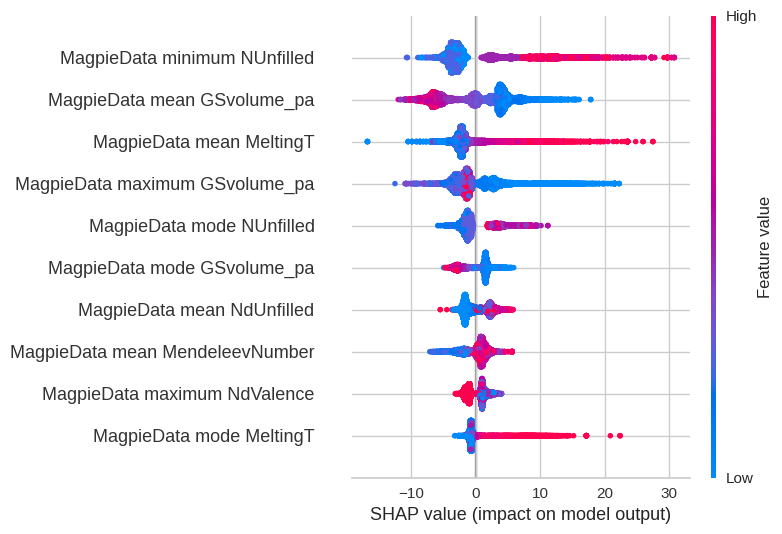

In [11]:
catboost_model_fi = catboost_model.fit(X_scaled, compositional_features_only_df['G_VRH'])
shap_values_catboost = shap.TreeExplainer(catboost_model_fi).shap_values(X_scaled)
shap.summary_plot(shap_values_catboost, X_scaled, max_display=10)